## *santoshhulbutti@gmail.com | DataTrained | Practice Project # 03

<h1 align="center"> Objective : to predict the wine quality </h1>
<h2> This will be a <u><font color = "green">supervised ML model</font></u> as the dataset has <u><font color = "green">'label' column</font></u> i.e., 'quality'. it will be a <u><font color ='blue'>classification problem - predicting the class/quality of the wine.</font></u>
    
performance metrics will be :
<font color ='purple'> Accuracy, Confusion Matrix, Precision, Recall, and F1 score, ROC AUC & Log-loss</font>
</h2>


<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [77]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from collections import Counter

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc


#logistic Regression
from sklearn.linear_model import LogisticRegression

# xgboost
from xgboost import XGBClassifier

# Random Forest Classifier & Gradient Boosting Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# CatBoost Classifier
from catboost import CatBoostClassifier, Pool


from sklearn.model_selection import GridSearchCV

import pickle

import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [2]:
#creating variable of url
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv"

In [3]:
#creating dataframe of data
data = pd.read_csv(url)

<h1 align="center"><font color = "red">Data Preprocessing & EDA</font> </h1>
<h2><font color = "blue">01. Checking the data using .head(), .sample(n), .shape, features' dtypes using .info() & renaming the column names</font></h2>

In [4]:
#checking top 5 rows
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#checking 10 samples
data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
928,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2,5
602,7.7,0.835,0.00,2.6,0.081,6.0,14.0,0.99750,3.30,0.52,9.3,5
758,8.1,0.870,0.00,2.2,0.084,10.0,31.0,0.99656,3.25,0.50,9.8,5
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7,6
136,8.3,0.715,0.15,1.8,0.089,10.0,52.0,0.99680,3.23,0.77,9.5,5
102,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
737,8.2,0.590,0.00,2.5,0.093,19.0,58.0,1.00020,3.50,0.65,9.3,6
1518,7.4,0.470,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5,5
304,8.4,0.650,0.60,2.1,0.112,12.0,90.0,0.99730,3.20,0.52,9.2,5
788,10.0,0.560,0.24,2.2,0.079,19.0,58.0,0.99910,3.18,0.56,10.1,6


In [6]:
#checking shape of the dataframe
data.shape

(1599, 12)

<h2> <font color = "green"> Observation:</font> we have 1599 rows & 12 columns in given dataset</h2>

In [7]:
#checking datatypes, length of row & size of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<h2> <font color = "green"> Observation:</font> All features are of the dtype float64 & label is of int64 type.</h2>

In [8]:
#renaming column names to remove whitespaces
columns = data.columns.tolist()
columns_renamed = [column.replace(" ", "_") for column in columns]
data.columns = columns_renamed
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<h2> <font color = "green"> Observation:</font> column names are renamed, whitespaces are removed.</h2>

<h2><font color = "blue">02. Checking for the duplicates, missing & null values</font></h2>

In [9]:
# counting number of duplicate rows
data.duplicated().sum()

240

<h2> <font color = "green"> Observation:</font> we have 240 rows of duplicate entries.</h2>

In [10]:
#check which rows are duplicate entries
data[data.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [11]:
#removing duplicates..
data01 = data.drop_duplicates()

In [12]:
#checking for duplicates again..
data01.duplicated().sum()

0

<h2> <font color = "green"> Observation:</font> Duplicate values are removed.!</h2>

In [13]:
#check for null values
data01.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

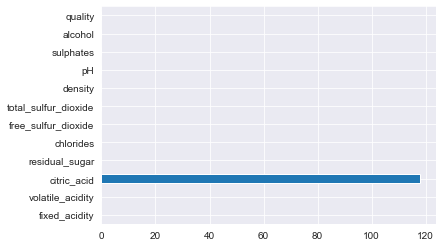

In [14]:
#check columns where it has value as zero
data01[data01==0].count().plot(kind = 'barh')

In [15]:
#check citric acid column
data01['citric_acid'].value_counts()

0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.71      1
0.78      1
0.62      1
0.79      1
Name: citric_acid, Length: 80, dtype: int64

<h2> <font color = "green"> Observation:</font> <i>citric_acid</i> column has 118 entries as 0 /zero.</h2>

In [16]:
# checking the shape after dropping duplicates..
data01.shape

(1359, 12)

<h2> <font color = "green"> Observation:</font> The data with no duplicate values has 1359 rows & 12 columns/features...</h2>

In [17]:
#initial statistical analysis
data01.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
# checking total type of classes in quality feature
data01['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<AxesSubplot:>

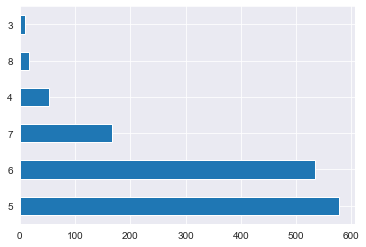

In [19]:
#plotting the quality feature
data01['quality'].value_counts().plot(kind = 'barh')

<h2> <font color = "green"> Observation:</font> Most of the wine observations are of the quality 5 & 6. It indicates the data is imbalanced & using this data will cause heavy biased results. we will deal with this using oversampling during train test set separation</h2>

<h2><font color = "blue">03. Checking for outliers</font></h2>

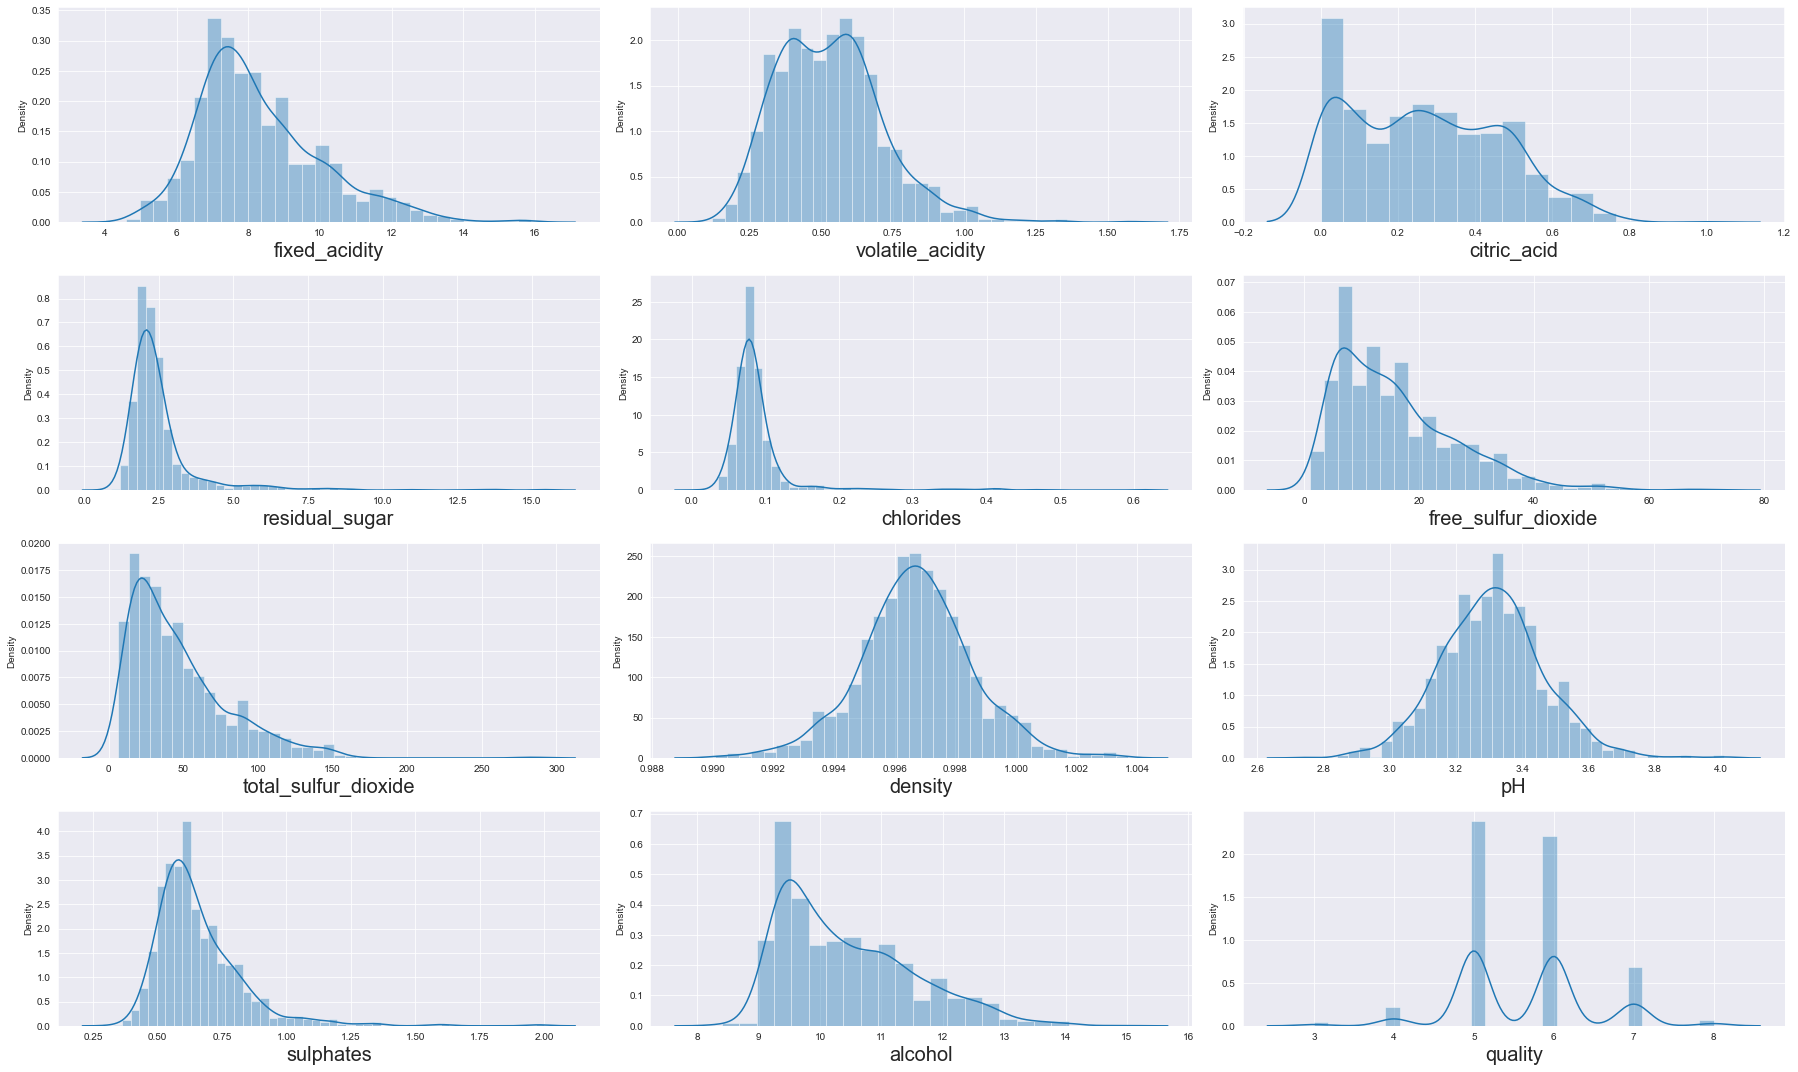

In [20]:
#checking distribution to see outliers in our dataset
plt.figure(figsize=(25,15))
plotnumber = 1

for column in data01:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data01[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

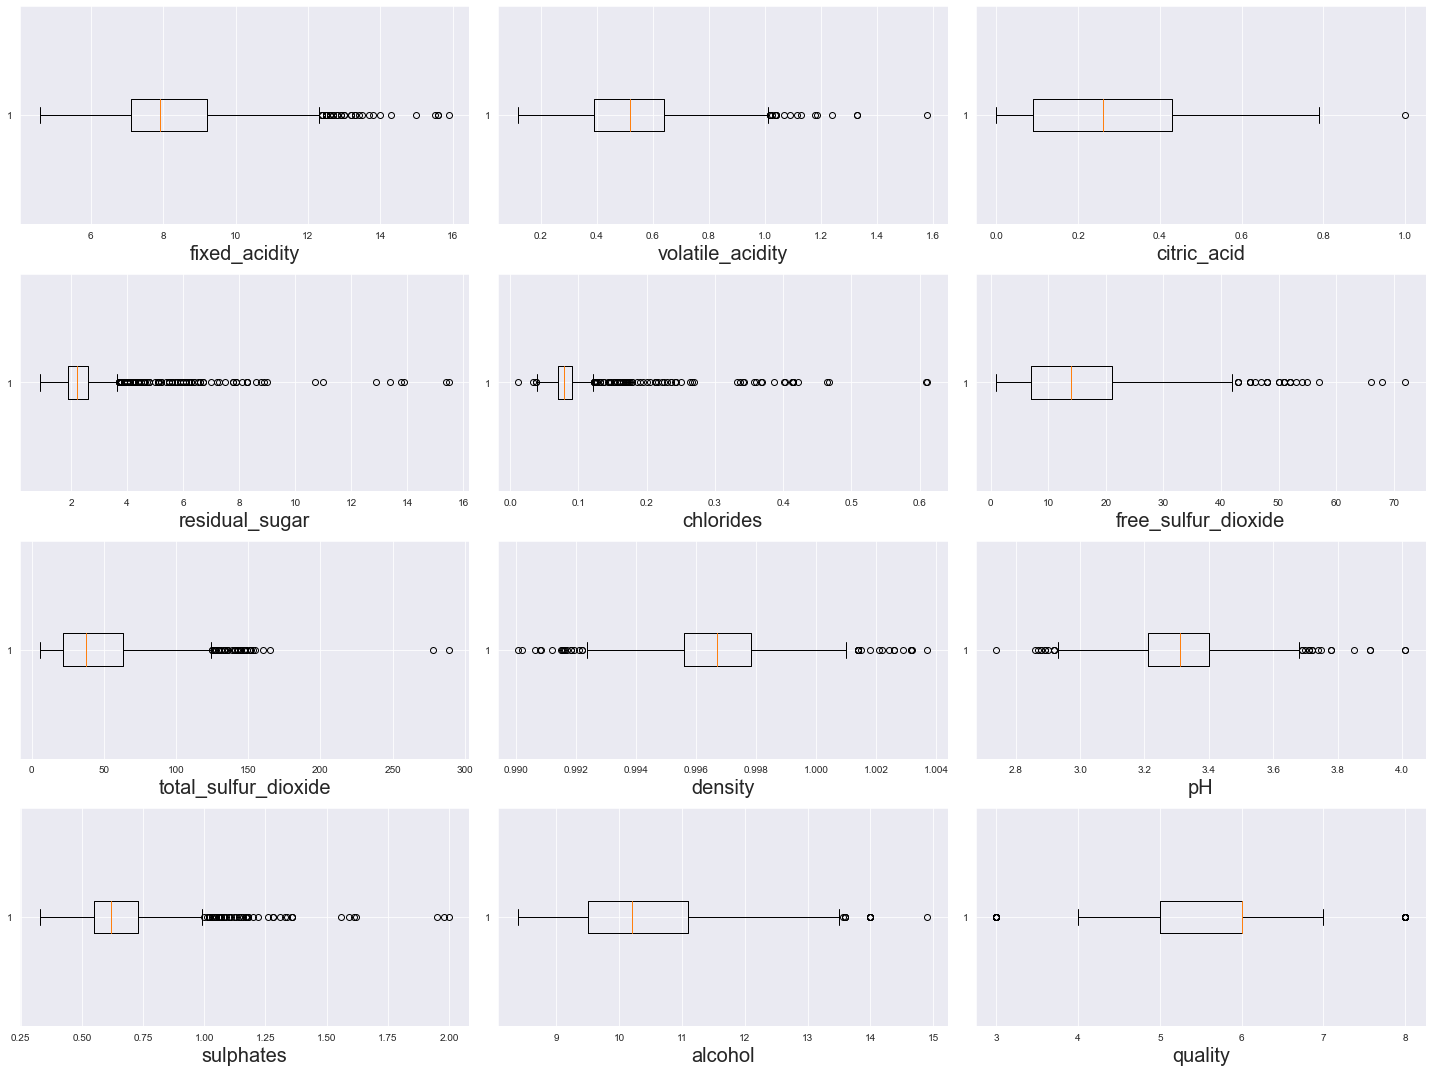

In [21]:
#visualizing outliers using boxplot graph
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data01:
# for column in data.drop('quality', axis=1):
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.boxplot(data01[column], vert=False)
#         plt.boxplot(data.drop('quality', axis=1)[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<h2> <font color = "green"> Observation:</font>
<h3><u>distribution plot:</u> Some features are skewed & there are outliers. all the features seem to have gaussian distribution.</h3>
<h3><u>from box plot:</u> residual_sugar & chlorides are having too many outliers.</h3>
</h2>

<h3> test01 : using standard deviation method to remove outliers</h3>

In [22]:
#making copy of our dataset
data02 = data01.copy()

In [23]:
# creating a function to remove outliers using standard deviation method...
def get_outliers_std(data):
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
        data_mean, data_std = np.mean(data[column]), np.std(data[column])
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return data.drop(data.index[indices_to_remove]) #returns the data with removed outliers




#  creating a function to remove outliers using inter quantile range...
def get_outliers_iqr(data):
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
#         data_mean, data_std = np.mean(data[column]), np.std(data[column])
#         cut_off = data_std * 3
        lower, upper = (q1[column] - (1.5*iqr[column])) , (q3[column] + (1.5*iqr[column]))

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return data.drop(data.index[indices_to_remove]) #returns the data with removed outliers

In [24]:
data03 = get_outliers_std(data02)

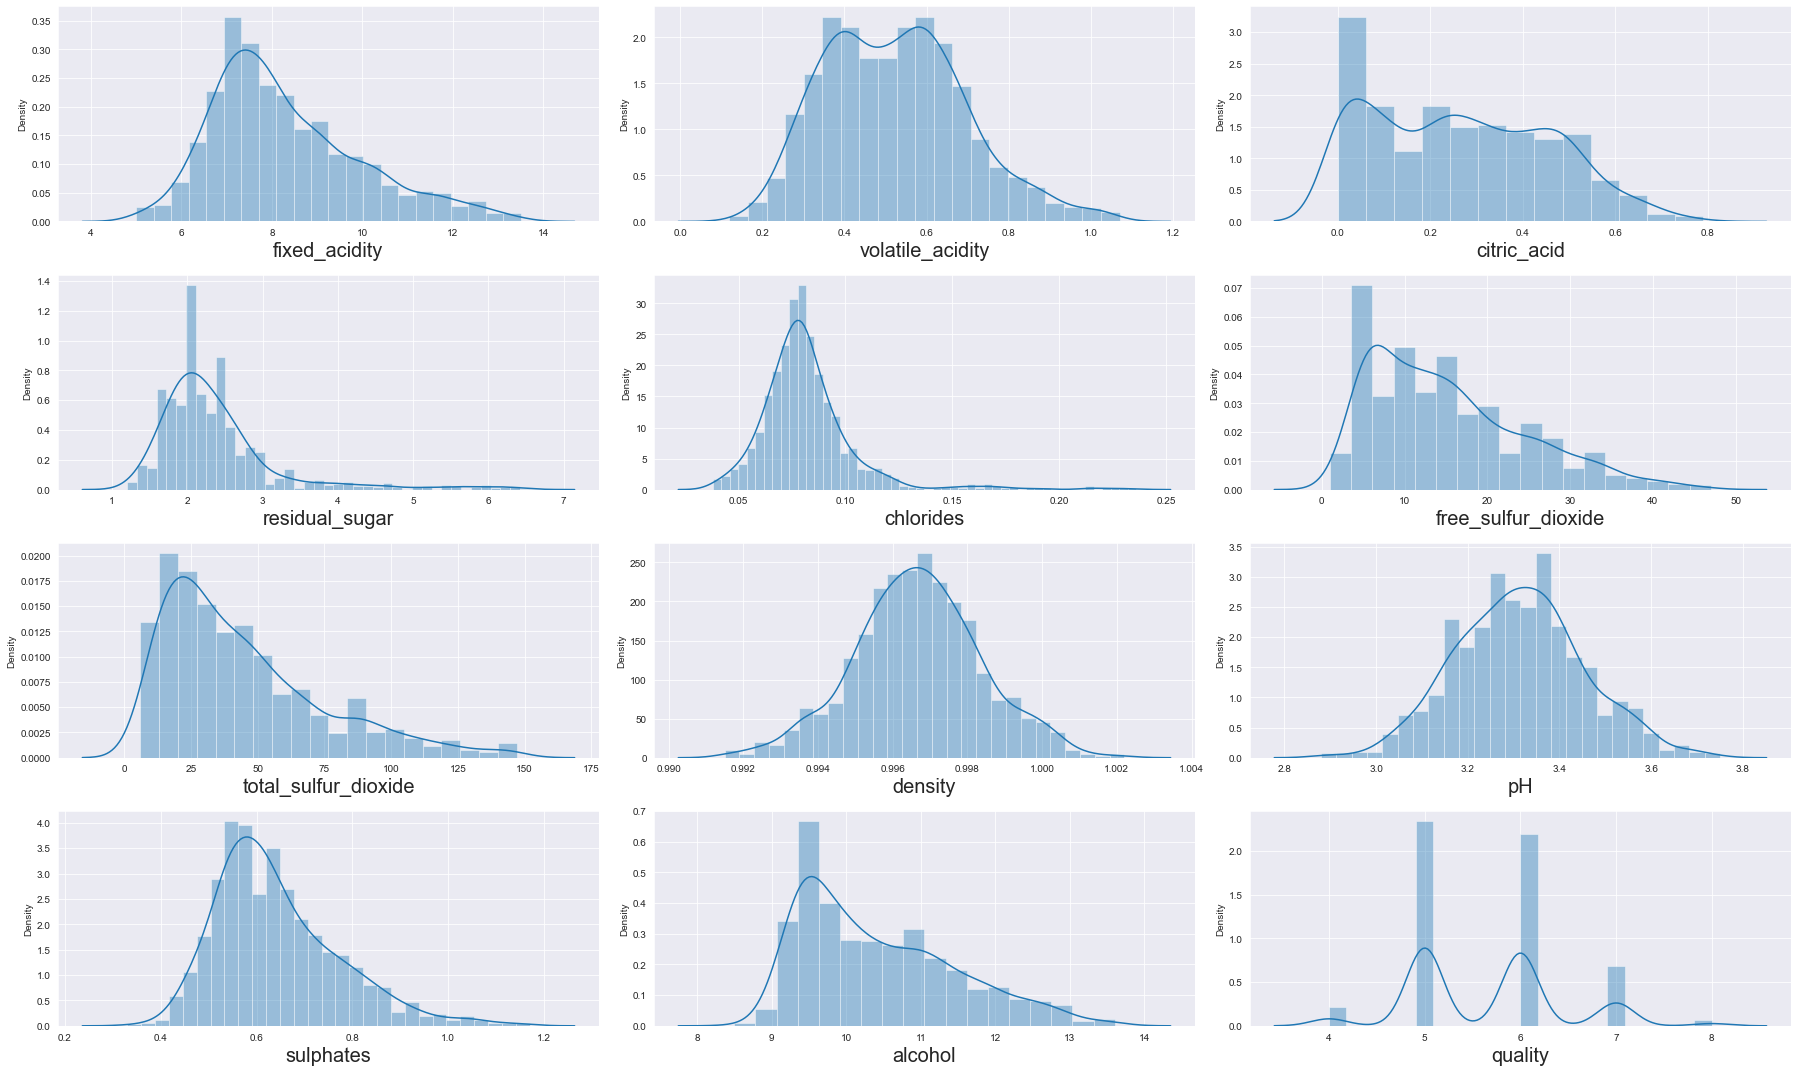

In [25]:
#checking distribution after removing outliers...
plt.figure(figsize=(25,15))
plotnumber = 1

for column in data03:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data03[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

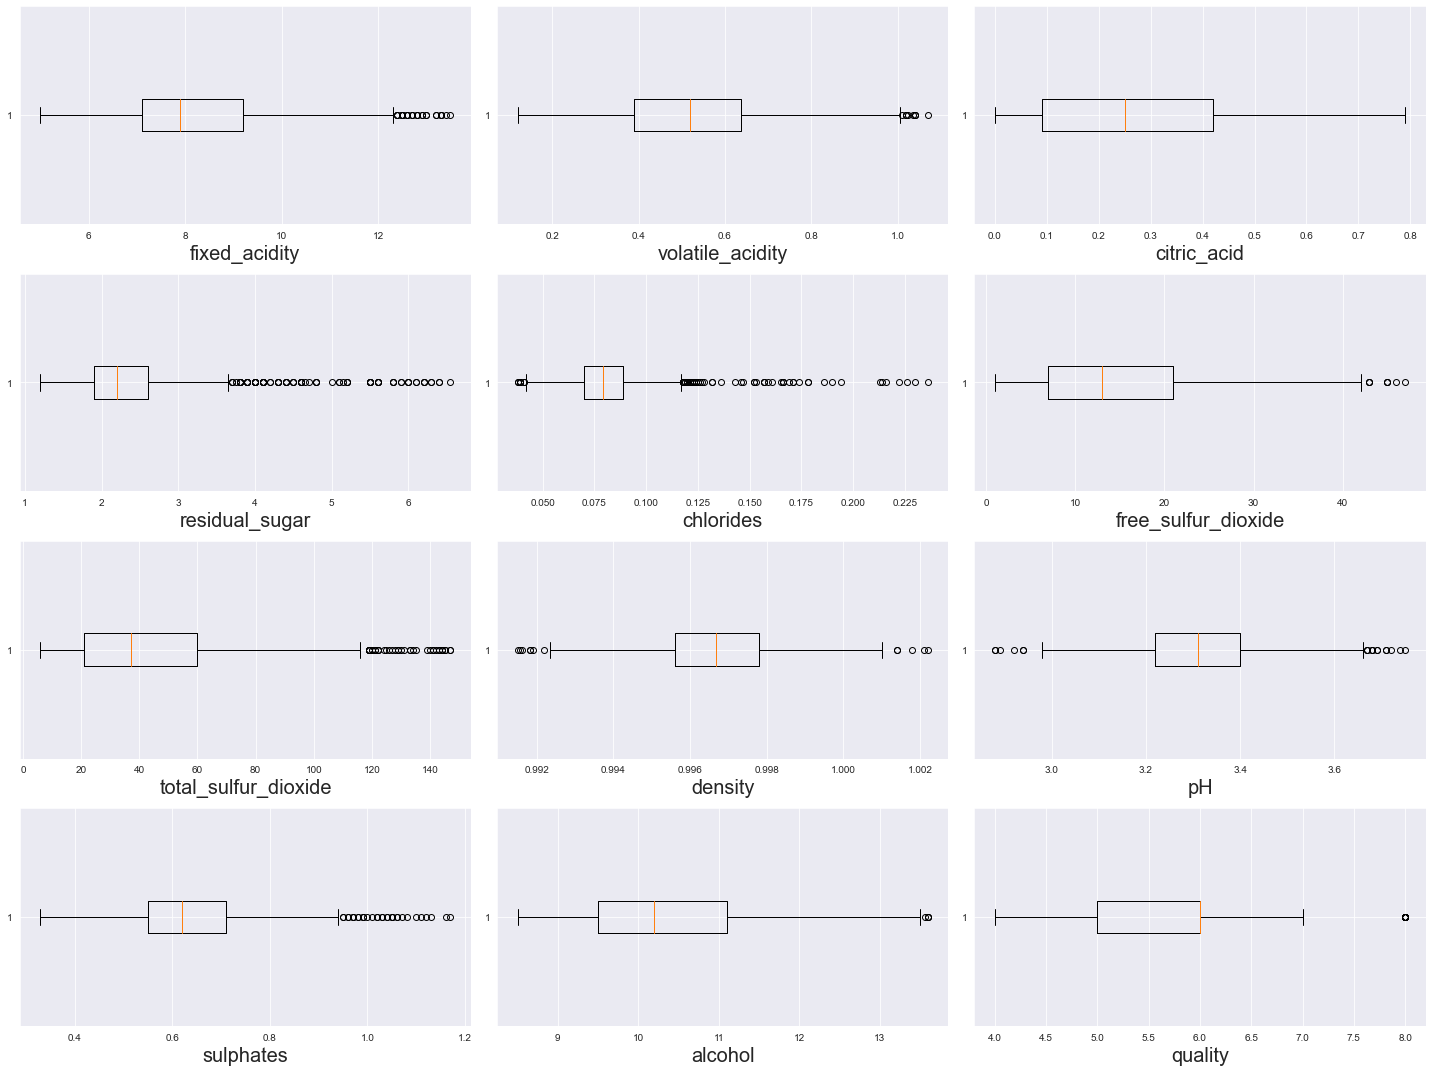

In [26]:
#visualizing dataset using boxplot after removing outliers...
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data03:
# for column in data.drop('quality', axis=1):
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.boxplot(data03[column], vert=False)
#         plt.boxplot(data.drop('quality', axis=1)[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<h2> <font color = "green"> Observation:</font>
<h3>after removing outliers based on standard deviation, <u>residual_sugar & chlorides</u> still showing outliers in both distribution & boxplot graph, also <u>free_sulfur_dioxide, total_sulfur_dioxide & alcohol features are still showing skewness</u></h3>
    
<h3> test02 : using inter quantile range method to remove outliers</h3>

In [27]:
data04 = get_outliers_iqr(data02)

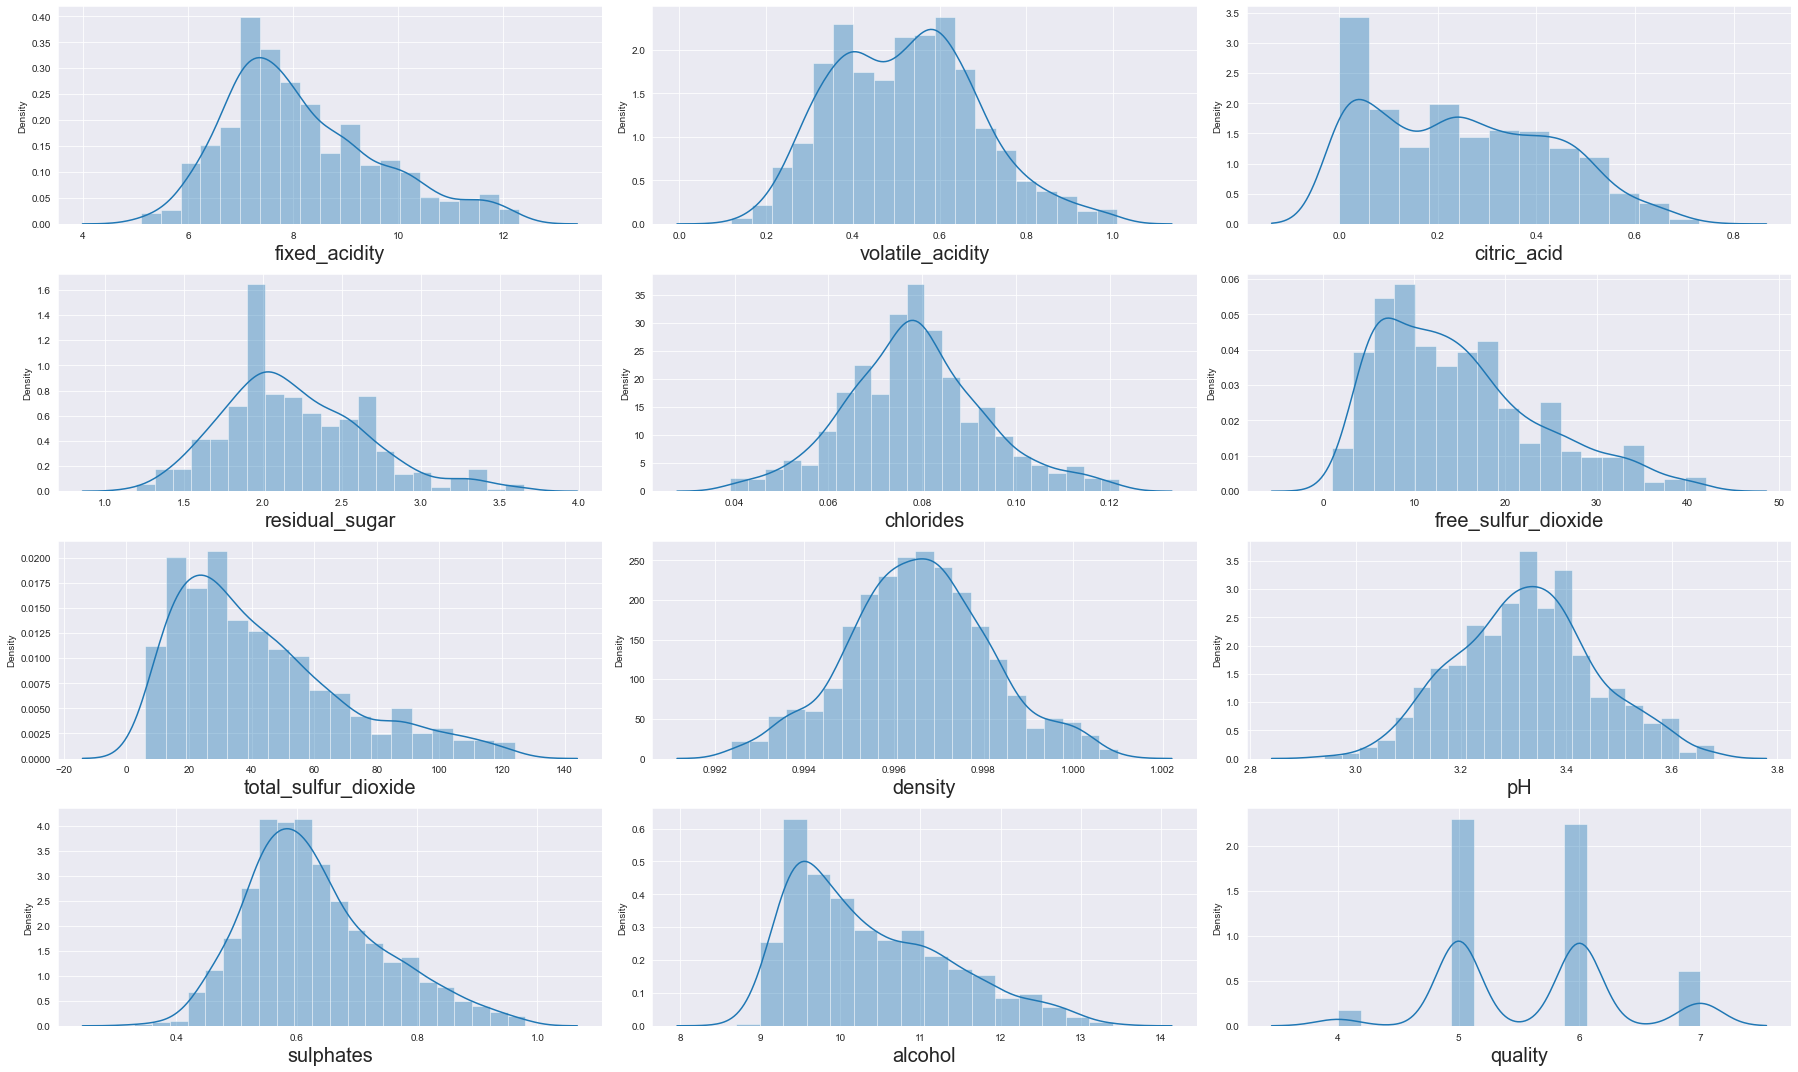

In [28]:
#checking distribution after removing outliers...
plt.figure(figsize=(25,15))
plotnumber = 1

for column in data04:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data04[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

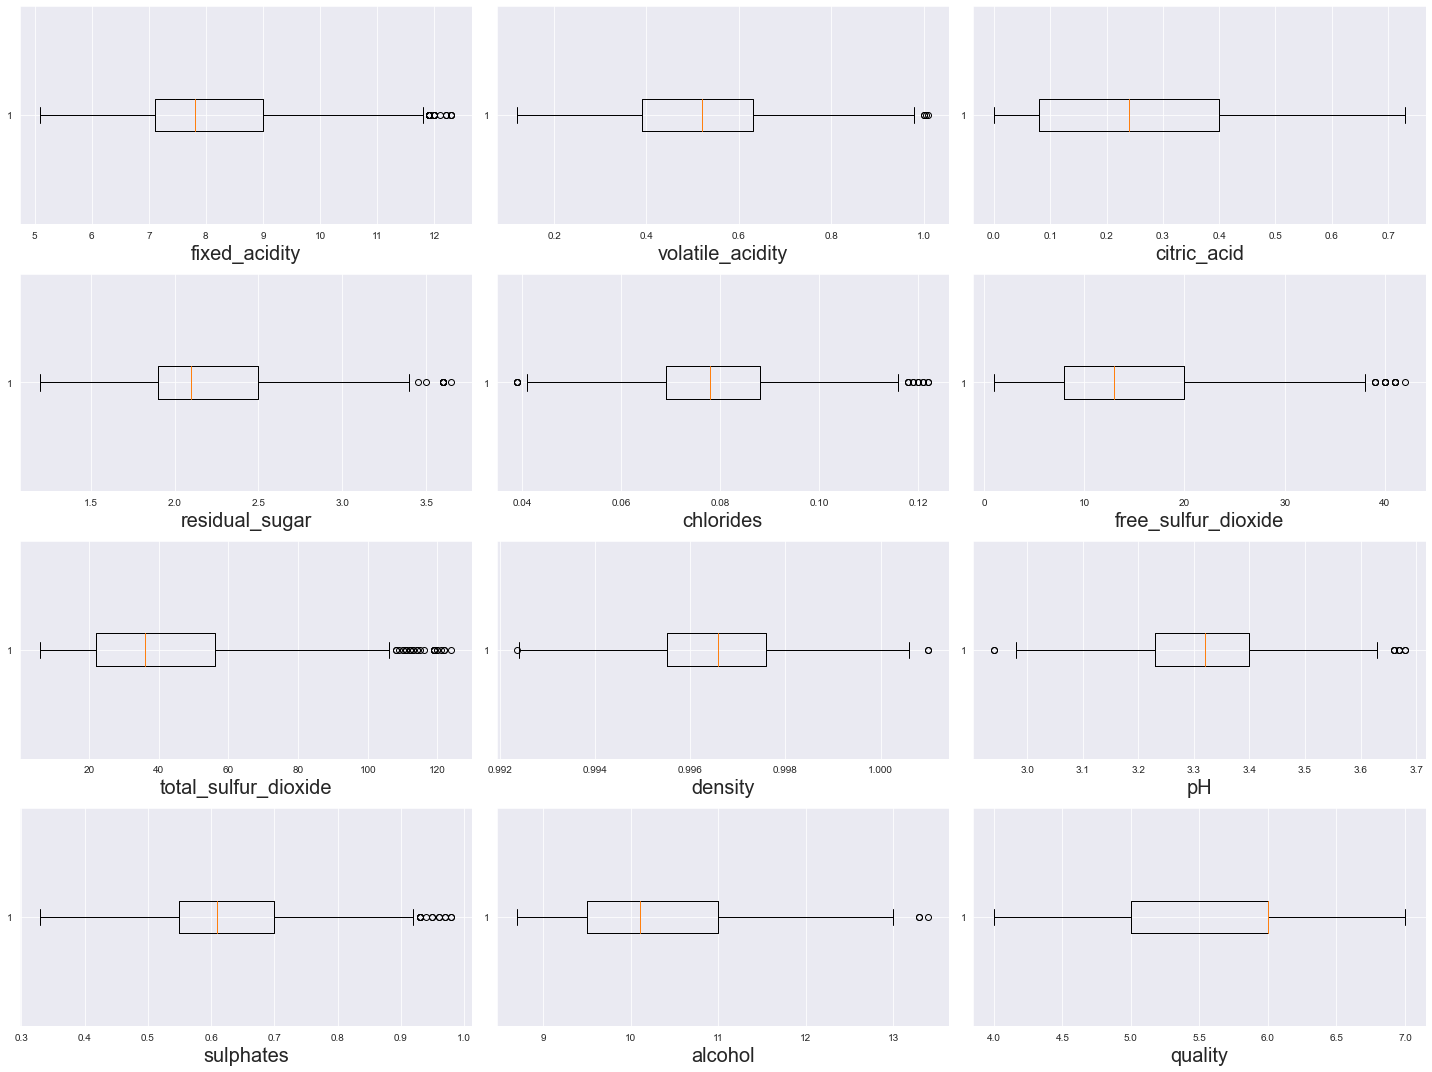

In [29]:
#visualizing dataset using boxplot after removing outliers...
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data04:
# for column in data.drop('quality', axis=1):
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.boxplot(data04[column], vert=False)
#         plt.boxplot(data.drop('quality', axis=1)[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [30]:
print("shape after using standard deviation method", get_outliers_std(data02).shape)
print("shape after using inter quantile range", get_outliers_iqr(data02).shape)

shape after using standard deviation method (1232, 12)
shape after using inter quantile range (1005, 12)


<h2> <font color = "green"> Observation:</font>As we see that using inter quantile method to remove outliers we would loose most of the data but we would get a better normally distributed data, hence we will continue with IQR method to remove outliers.</h2>

<h2><font color = "blue">04. Checking for Multicollinearity</font></h2>

In [31]:
data04

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Separating feature & label data & Applying Standard Scaler to our feature data.

In [32]:
x = data04.drop('quality', axis = 1)

In [33]:
scaler = StandardScaler()

In [34]:
x_scaled = scaler.fit_transform(x)

In [35]:
x_scaled

array([[-0.52086914,  1.06426146, -1.37469161, ...,  1.41612194,
        -0.61211216, -0.99100234],
       [-0.24925233,  2.14486034, -1.37469161, ..., -0.93027379,
         0.43499034, -0.58229966],
       [-0.24925233,  1.42446109, -1.15431994, ..., -0.47613268,
         0.17321472, -0.58229966],
       ...,
       [-1.53943214,  0.1637624 , -0.82376244, ...,  1.49181212,
         1.13305867,  0.84815973],
       [-1.53943214,  0.73407847, -0.71357661, ...,  1.87026304,
         0.69676597, -0.17359697],
       [-1.47152794, -1.2770361 ,  1.21467546, ...,  0.50783972,
         0.26047326,  0.64380839]])

In [36]:
x_scaled.shape

(1005, 11)

## Check for Variance Inflation factor

In [37]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif_data.sort_values(by = "VIF", ascending=False)

,feature,VIF
0,fixed_acidity,6.975874
7,density,6.588634
10,alcohol,3.552026
8,pH,3.121471
2,citric_acid,3.006025
6,total_sulfur_dioxide,2.089413
1,volatile_acidity,1.966331
5,free_sulfur_dioxide,1.820345
3,residual_sugar,1.681335
9,sulphates,1.325514


## Check for correlation using sns.heatmap()

<function matplotlib.pyplot.show(close=None, block=None)>

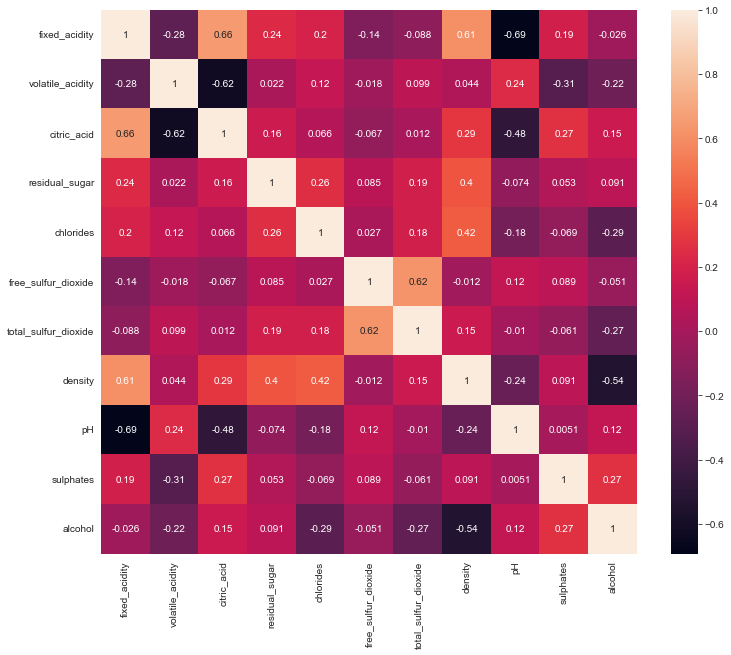

In [38]:
feature_data = pd.DataFrame(x_scaled, columns = x.columns)
plt.figure(figsize=(12,10))
sns.heatmap(feature_data.corr(), annot=True)
plt.show

In [39]:
corr_matrix = feature_data.corr()
corr_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.000000,-0.282019,0.655777,0.239487,0.202368,-0.144925,-0.087810,0.610015,-0.692128,0.185839,-0.025770
volatile_acidity,-0.282019,1.000000,-0.621121,0.021976,0.124282,-0.018433,0.099376,0.043580,0.241762,-0.308814,-0.222085
citric_acid,0.655777,-0.621121,1.000000,0.155535,0.065903,-0.067158,0.011869,0.289552,-0.477620,0.270070,0.152067
residual_sugar,0.239487,0.021976,0.155535,1.000000,0.259101,0.085180,0.186835,0.396153,-0.073672,0.053014,0.091426
chlorides,0.202368,0.124282,0.065903,0.259101,1.000000,0.026697,0.181407,0.424603,-0.184797,-0.069210,-0.291450
free_sulfur_dioxide,-0.144925,-0.018433,-0.067158,0.085180,0.026697,1.000000,0.623980,-0.012027,0.119040,0.089043,-0.050641
total_sulfur_dioxide,-0.087810,0.099376,0.011869,0.186835,0.181407,0.623980,1.000000,0.150321,-0.010152,-0.060509,-0.265482
density,0.610015,0.043580,0.289552,0.396153,0.424603,-0.012027,0.150321,1.000000,-0.241898,0.091304,-0.538401
pH,-0.692128,0.241762,-0.477620,-0.073672,-0.184797,0.119040,-0.010152,-0.241898,1.000000,0.005097,0.118311
sulphates,0.185839,-0.308814,0.270070,0.053014,-0.069210,0.089043,-0.060509,0.091304,0.005097,1.000000,0.268061


<h2> <font color = "green"> Observation:</font> From VIF value & correlation heatmap, we observe that, 'fixed_acidity' feature has high multicollinearity with 'density' & 'citric_acid' features, hence we will remove 'fixed_acidity' column from our dataset for further study.</h2>

In [40]:
x = data04.drop(['quality', 'fixed_acidity'], axis = 1)

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x_scaled.values, i) for i in range(len(x_scaled.columns))]

vif_data.sort_values(by = "VIF", ascending=False)

,feature,VIF
6,density,2.983729
1,citric_acid,2.715722
9,alcohol,2.582309
5,total_sulfur_dioxide,2.027127
0,volatile_acidity,1.961596
4,free_sulfur_dioxide,1.814562
2,residual_sugar,1.586958
7,pH,1.414197
8,sulphates,1.319072
3,chlorides,1.301874


<h2> <font color = "green"> Observation:</font> From above we observe that, no feature is having VIF value above 3. Hence we have removed multicolinearity from our data.</h2>

<h2><font color = "blue">05. Preparing data for ML model</font></h2>

## We will classify wine as good(1) if quality value is greater than 6 & bad(0) if not.

In [41]:
#classifying label data into 1 & 0
threshold = 6
y = data04['quality']>6
group = {True : 1, False :0}

In [42]:
y = y.map(group)

In [43]:
y.value_counts()

0    890
1    115
Name: quality, dtype: int64

## preparing train & test set..

In [44]:
#Creating train & test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=41)

In [45]:
Counter(y_train)

Counter({0: 667, 1: 86})

In [46]:
Counter(y_test)

Counter({0: 223, 1: 29})

<h2> <font color = "green"> Observation:</font> The data given is heavily biased towards the wines which are bad in quality. we will use over sampling method to overcome imbalenced data.</h2>

In [47]:
#Using Smote oversampling method to balance data
ove_smp = SMOTE(0.75)

x_train_ns, y_train_ns = ove_smp.fit_sample(x_train, y_train)

print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 667, 1: 86})
Counter({0: 667, 1: 500})


<h2> <font color = "green"> Observation:</font> As seen above after oversampling our train set has pretty much good observations.</h2>

<h1 align="center"><font color = "red">Classification Model selection</font> </h1>

###  We will check following models & select the best performing one

Logistic Regression

xgboost

Random Forest Classifier

Decision Tree Classifier

K Neighbors Classifier

CatBoost Classifier

<h2><font color = "blue">Creating functions to plot & calculate <font color = "red"> cross validation & evaluation metrics </font>for classification model</font></h2>

In [52]:
## TO PLOT CONFUSION MATRIX
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    class_label = ["Bad", "Good"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    
# TO set cv value for cross_val_score
k_f = StratifiedKFold(shuffle=True)


# TO print classification report
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"accuracy score for train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
              
    elif train==False:
        y_pred = clf.predict(x_test)
        print(f"accuracy score for test : {accuracy_score(y_test,y_pred) * 100:.2f}%")
        k_f
        cv_score = cross_val_score(clf, x_train, y_train, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score is : {cv_score*100:.2f}%")
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        confusion_matrix_c(y_test, y_pred)
        y_predict_probabilities = clf.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
        roc_auc = auc(fpr, tpr)
        plot_roc_auc_curve(fpr, tpr)

<h2><font color="blue"> 1. Checking how does Logistic Regression perform...</font></h2>

accuracy score for train : 83.03%
accuracy score for test : 81.75%
Cross Validation score is : 82.78%

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       223
           1       0.35      0.69      0.47        29

    accuracy                           0.82       252
   macro avg       0.65      0.76      0.68       252
weighted avg       0.88      0.82      0.84       252



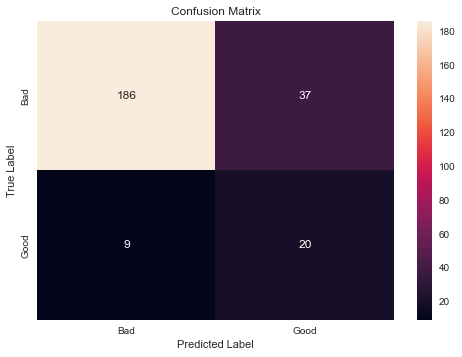

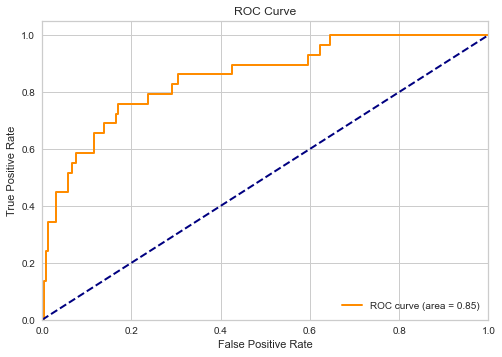

In [53]:
logreg = LogisticRegression()
logreg.fit(x_train_ns, y_train_ns)
print_score(logreg, x_train_ns, x_test, y_train_ns, y_test, train=True)
print_score(logreg, x_train_ns, x_test, y_train_ns, y_test, train=False)

<h2><font color="blue"> 2. Checking how does Gradient Boosting Classifier perform...</font></h2>

accuracy score for train : 97.34%
accuracy score for test : 87.70%
Cross Validation score is : 89.37%

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       223
           1       0.47      0.59      0.52        29

    accuracy                           0.88       252
   macro avg       0.71      0.75      0.73       252
weighted avg       0.89      0.88      0.88       252



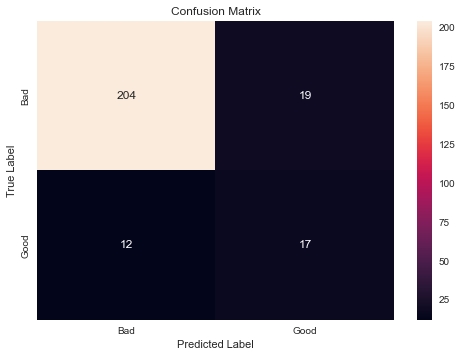

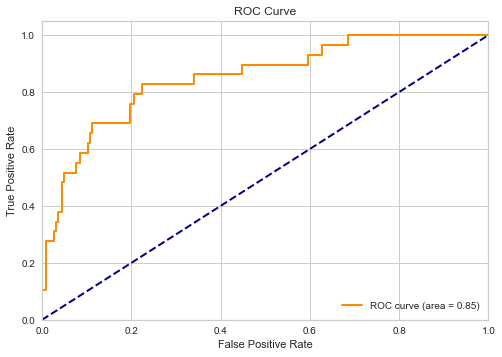

In [54]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train_ns, y_train_ns)
print_score(gbdt_clf, x_train_ns, x_test, y_train_ns, y_test, train=True)
print_score(gbdt_clf, x_train_ns, x_test, y_train_ns, y_test, train=False)

<h2><font color="blue"> 3. Checking how does XGB Classifier perform...</font></h2>

[13:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score for train : 100.00%
accuracy score for test : 88.49%
[13:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1

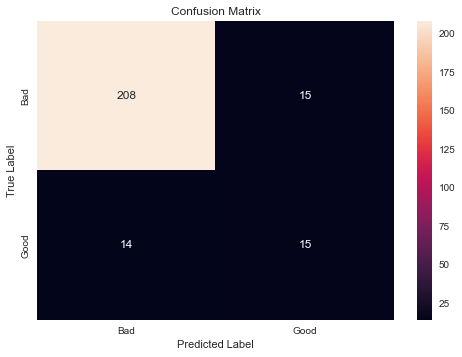

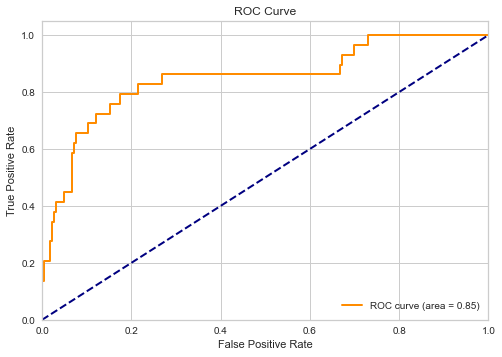

In [55]:
xgb = XGBClassifier()
xgb.fit(x_train_ns, y_train_ns)
print_score(xgb, x_train_ns, x_test, y_train_ns, y_test, train=True)
print_score(xgb, x_train_ns, x_test, y_train_ns, y_test, train=False)

<h2><font color="blue"> 4. Checking how does Random Forest Classifier perform...</font></h2>

accuracy score for train : 84.49%
accuracy score for test : 80.56%
Cross Validation score is : 83.29%

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       223
           1       0.32      0.62      0.42        29

    accuracy                           0.81       252
   macro avg       0.63      0.73      0.65       252
weighted avg       0.87      0.81      0.83       252



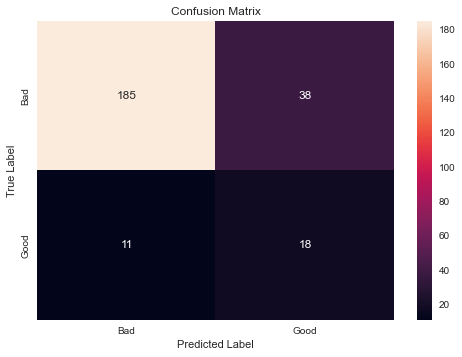

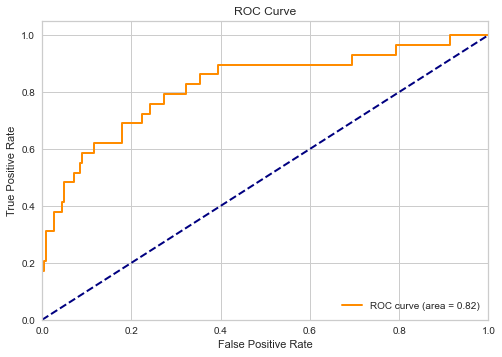

In [56]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train_ns, y_train_ns)
print_score(clf, x_train_ns, x_test, y_train_ns, y_test, train=True)
print_score(clf, x_train_ns, x_test, y_train_ns, y_test, train=False)

<h2><font color="blue"> 5. Checking how does Decision Tree Classifier perform...</font></h2>

accuracy score for train : 100.00%
accuracy score for test : 79.37%
Cross Validation score is : 86.63%

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       223
           1       0.27      0.45      0.33        29

    accuracy                           0.79       252
   macro avg       0.59      0.64      0.61       252
weighted avg       0.85      0.79      0.82       252



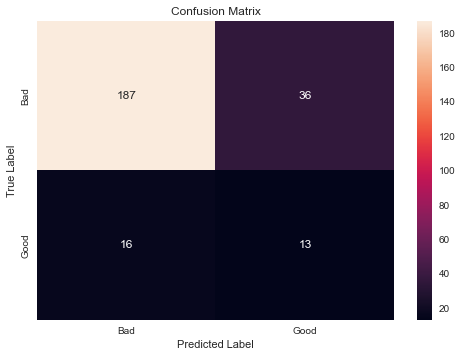

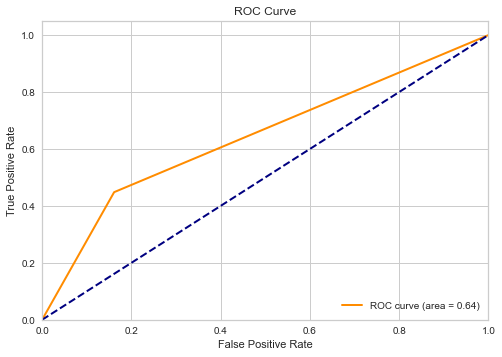

In [57]:
clfdt = DecisionTreeClassifier(random_state=0)
clfdt.fit(x_train_ns, y_train_ns)
print_score(clfdt, x_train_ns, x_test, y_train_ns, y_test, train=True)
print_score(clfdt, x_train_ns, x_test, y_train_ns, y_test, train=False)

<h2><font color="blue"> 6. Checking how does KNeighbors Classifier perform...</font></h2>

accuracy score for train : 93.23%
accuracy score for test : 82.54%
Cross Validation score is : 88.60%

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.95      0.84      0.90       223
           1       0.36      0.69      0.48        29

    accuracy                           0.83       252
   macro avg       0.66      0.77      0.69       252
weighted avg       0.89      0.83      0.85       252



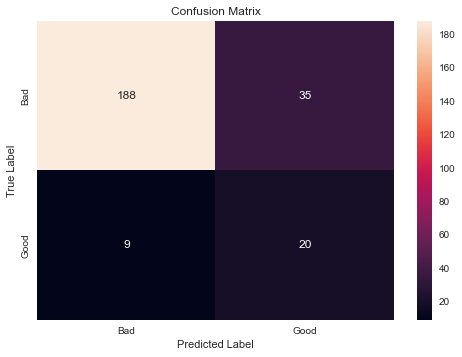

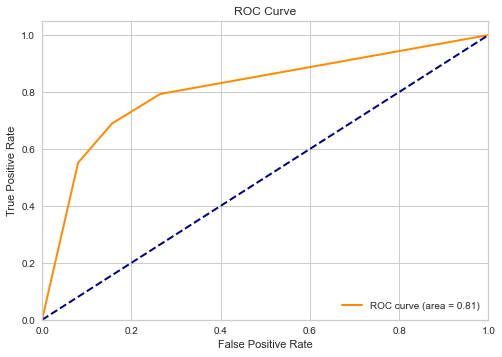

In [58]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_ns, y_train_ns)
print_score(neigh, x_train_ns, x_test, y_train_ns, y_test, train=True)
print_score(neigh, x_train_ns, x_test, y_train_ns, y_test, train=False)

<h2><font color="blue"> 7. Checking how does CatBoost Classifier perform...</font></h2>

0:	learn: 0.4953623	total: 143ms	remaining: 143ms
1:	learn: 0.4359059	total: 144ms	remaining: 0us
accuracy score for train : 81.75%
accuracy score for test : 76.59%
0:	learn: 0.4873988	total: 5.91ms	remaining: 5.91ms
1:	learn: 0.4359104	total: 6.77ms	remaining: 0us
0:	learn: 0.4827601	total: 534us	remaining: 534us
1:	learn: 0.4358299	total: 1.49ms	remaining: 0us
0:	learn: 0.4935906	total: 16.7ms	remaining: 16.7ms
1:	learn: 0.4344406	total: 17.3ms	remaining: 0us
0:	learn: 0.4937650	total: 579us	remaining: 579us
1:	learn: 0.4442344	total: 1.13ms	remaining: 0us
0:	learn: 0.4756336	total: 1.62ms	remaining: 1.62ms
1:	learn: 0.4147657	total: 2.26ms	remaining: 0us
Cross Validation score is : 80.46%

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.97      0.76      0.85       223
           1       0.31      0.83      0.45        29

    accuracy                           0.77       252
   macro avg       0.64      0.79      0.65     

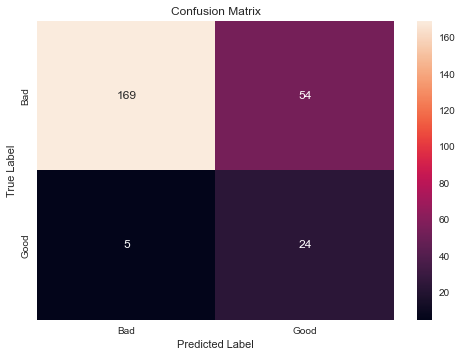

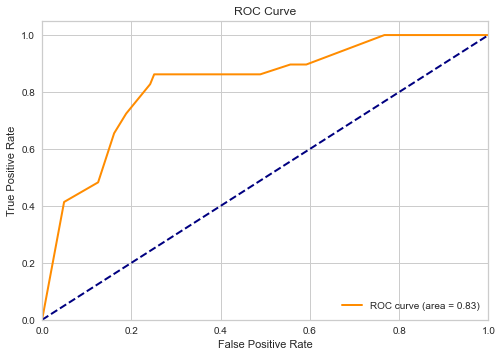

In [59]:
catbst = CatBoostClassifier(iterations=2, depth=2, learning_rate=1, loss_function='Logloss', verbose=True)
catbst.fit(x_train_ns, y_train_ns)
print_score(catbst, x_train_ns, x_test, y_train_ns, y_test, train=True)
print_score(catbst, x_train_ns, x_test, y_train_ns, y_test, train=False)

<h2> <font color = "green"> Observation:</font> From initial models study we found that of all the 7 models, Gradient Boosting Classifier has better test accuracy score, cross validation score, precision, Recall better AUC value.</h2>

<h1 align="center"><font color = "red">Hyperparameter Tuning using GridSearchCV</font></h1>

In [69]:
## Defining grid parameters for gradient boosting classifier

grid_param = {
    'criterion' : ['friedman_mse', 'squared_error', 'mse'],
    'loss' : ['log_loss', 'deviance', 'exponential'],
    'max_depth' : range(2,10),
    'min_samples_leaf' : range(1, 6),
    'min_samples_split' : range(2, 8),
    'max_leaf_nodes' : range(3, 10)
}

In [70]:
grid_search = GridSearchCV(estimator = gbdt_clf,
                          param_grid = grid_param,
                          cv=5,
                          n_jobs  = -1)

In [71]:
grid_search.fit(x_train_ns, y_train_ns)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [72]:
best_params = grid_search.best_params_
best_params

{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'max_depth': 8,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

accuracy score for train : 99.49%
accuracy score for test : 85.71%
Cross Validation score is : 90.40%

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       223
           1       0.39      0.45      0.42        29

    accuracy                           0.86       252
   macro avg       0.66      0.68      0.67       252
weighted avg       0.87      0.86      0.86       252



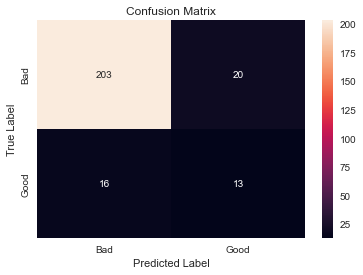

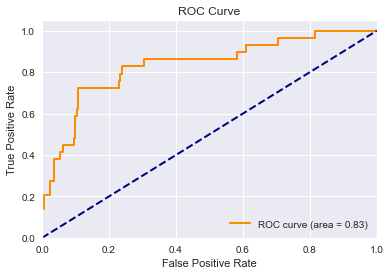

In [75]:
gbdt_clf_tuned = GradientBoostingClassifier(criterion = 'friedman_mse',
                                      loss = 'deviance',
                                      max_depth = 8,
                                      max_leaf_nodes = 9,
                                      min_samples_leaf = 5,
                                      min_samples_split = 2)
gbdt_clf_tuned.fit(x_train_ns, y_train_ns)
print_score(gbdt_clf_tuned, x_train_ns, x_test, y_train_ns, y_test, train=True)
print_score(gbdt_clf_tuned, x_train_ns, x_test, y_train_ns, y_test, train=False)

<h1 align="center"><font color = "red">Model Saving & Predicting</font></h1>

In [78]:
pickle.dump(gbdt_clf_tuned, open('Wine_quality_prediction', 'wb'))

In [89]:
loaded_model = pickle.load(open('Wine_quality_prediction', 'rb'))

#Creating function to check display quality of wine
def check_quality(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10):
    if loaded_model.predict(scaler.transform([[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]]))[0]:
        print('Wine is of GOOD quality!!')
    
    else:
        print('Wine is of BAD quality!!')

In [91]:
data04.sample(8)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
479,9.4,0.685,0.11,2.70,0.077,6.0,31.0,0.99840,3.19,0.70,10.1,6
1569,6.2,0.510,0.14,1.90,0.056,15.0,34.0,0.99396,3.48,0.57,11.5,6
220,7.8,0.340,0.37,2.00,0.082,24.0,58.0,0.99640,3.34,0.59,9.4,6
230,5.2,0.480,0.04,1.60,0.054,19.0,106.0,0.99270,3.54,0.62,12.2,7
931,7.4,0.610,0.01,2.00,0.074,13.0,38.0,0.99748,3.48,0.65,9.8,5
841,6.6,0.660,0.00,3.00,0.115,21.0,31.0,0.99629,3.45,0.63,10.3,5
441,11.9,0.400,0.65,2.15,0.068,7.0,27.0,0.99880,3.06,0.68,11.3,6
1045,6.9,0.440,0.00,1.40,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6


In [90]:
check_quality(0.8, 0.1, 1.8, 0.06, 20, 35, 0.99, 2.9, 0.5, 8)
check_quality(0.5, 0.09, 2.2, 0.16, 10, 42, 0.9971, 3.18, 0.62, 9.5)
check_quality(0.16,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2)
check_quality(0.53,0.57,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6)
check_quality(0.71,0.00,1.9,0.080,14.0,35.0,0.99720,3.47,0.55,9.4)

Wine is of BAD quality!!
Wine is of BAD quality!!
Wine is of BAD quality!!
Wine is of GOOD quality!!
Wine is of BAD quality!!
